<a href="https://colab.research.google.com/github/DulminiBhagya/Bhagya/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()   # use the file picker and upload student_performance_dataset.csv
# after upload, the file will be in current working dir

Saving student_performance_dataset (1).csv to student_performance_dataset (1).csv


In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# plotting config
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
# Replace filename if needed (example names)
filename = "student_performance_dataset (1).csv"   # or "student_performance_dataset (1).csv"

data = pd.read_csv(filename)
print("Rows, Columns:", data.shape)
display(data.head())
display(data.info())
display(data.describe())


Rows, Columns: (100, 5)


,Student_ID,Attendance,Study_Hours,Internal_Marks,Pass/Fail
0,1,78,3.9,84,Pass
1,2,91,3.6,85,Pass
2,3,68,5.8,46,Fail
3,4,54,5.2,67,Fail
4,5,82,4.7,53,Pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      100 non-null    int64  
 1   Attendance      100 non-null    int64  
 2   Study_Hours     100 non-null    float64
 3   Internal_Marks  100 non-null    int64  
 4   Pass/Fail       100 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


None

,Student_ID,Attendance,Study_Hours,Internal_Marks
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,69.580000,3.419000,63.740000
std,29.011492,18.031499,1.354729,19.763562
min,1.000000,41.000000,1.000000,30.000000
25%,25.750000,54.000000,2.300000,48.000000
50%,50.500000,68.000000,3.400000,62.000000
75%,75.250000,86.000000,4.425000,79.250000
max,100.000000,99.000000,6.000000,99.000000


Missing values per column:
 Student_ID        0
Attendance        0
Study_Hours       0
Internal_Marks    0
Pass/Fail         0
dtype: int64

Value counts for Pass/Fail:
 Pass/Fail
Fail    78
Pass    22
Name: count, dtype: int64


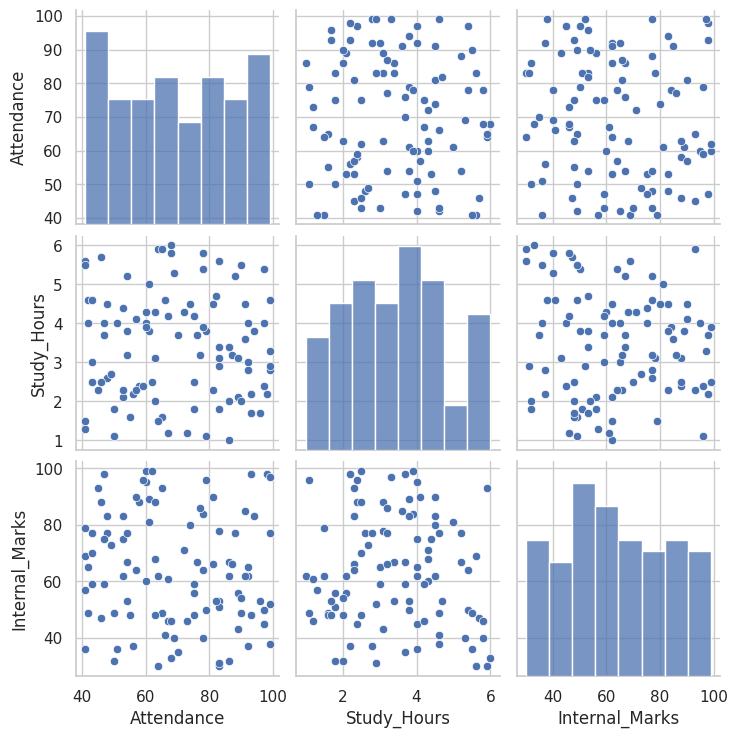

In [ ]:
print("Missing values per column:\n", data.isnull().sum())
print("\nValue counts for Pass/Fail:\n", data['Pass/Fail'].value_counts())
sns.pairplot(data[['Attendance','Study_Hours','Internal_Marks','Pass/Fail']].sample(min(200, len(data))))
plt.show()


In [ ]:
# If Pass/Fail are strings:
if data['Pass/Fail'].dtype == object:
    data['Pass/Fail'] = data['Pass/Fail'].map({'Pass':1, 'Fail':0})

# Verify
display(data['Pass/Fail'].value_counts())


,count
Pass/Fail,
0,78
1,22


In [ ]:
X = data[['Attendance','Study_Hours','Internal_Marks']]
y = data['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (80, 3) Test shape: (20, 3)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
models = {'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm}
results = {}

for name, model in models.items():
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    cr = classification_report(y_test, pred, digits=4)
    results[name] = {'accuracy': acc, 'confusion_matrix': cm, 'report': cr}
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("\n")


=== Decision Tree ===
Accuracy: 1.0
Confusion Matrix:
 [[16  0]
 [ 0  4]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     1.0000    1.0000    1.0000         4

    accuracy                         1.0000        20
   macro avg     1.0000    1.0000    1.0000        20
weighted avg     1.0000    1.0000    1.0000        20



=== Random Forest ===
Accuracy: 1.0
Confusion Matrix:
 [[16  0]
 [ 0  4]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     1.0000    1.0000    1.0000         4

    accuracy                         1.0000        20
   macro avg     1.0000    1.0000    1.0000        20
weighted avg     1.0000    1.0000    1.0000        20



=== SVM ===
Accuracy: 0.85
Confusion Matrix:
 [[15  1]
 [ 2  2]]
Classification Report:
               precision    recall  f1-score   support

  

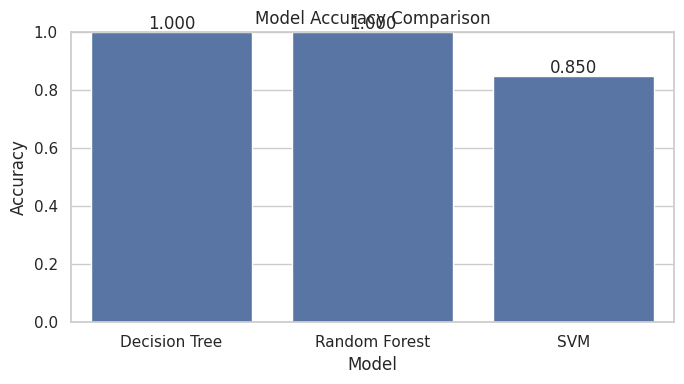

In [ ]:
model_names = list(results.keys())
accuracies = [results[n]['accuracy'] for n in model_names]

plt.figure(figsize=(7,4))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=150)
plt.show()


,Feature,Importance
0,Attendance,0.437208
2,Internal_Marks,0.306484
1,Study_Hours,0.256307


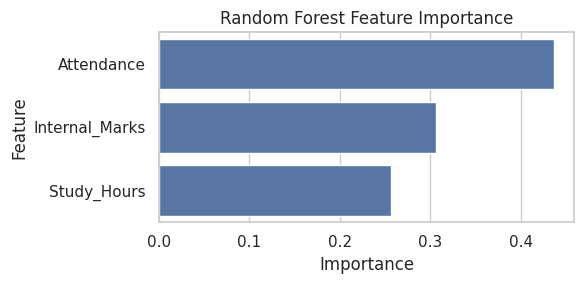

In [ ]:
feat_importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': feat_importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
display(feat_df)

plt.figure(figsize=(6,3))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=150)
plt.show()


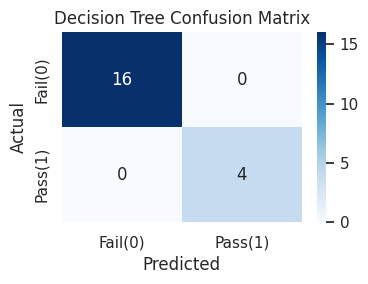

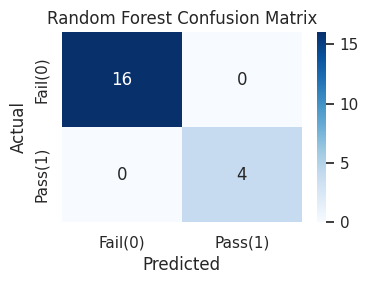

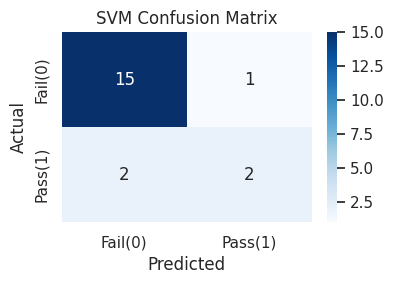

In [ ]:
import itertools

def plot_cm(cm, labels, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.tight_layout()
    plt.show()

for name in model_names:
    plot_cm(results[name]['confusion_matrix'], ['Fail(0)','Pass(1)'], f"{name} Confusion Matrix")
